# Project 2 - Advanced Methods in Applied Statistics 2024 - Emilie Jessen

In [320]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import scipy 
from iminuit import Minuit

In [385]:
# Set som plotting standards:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 18}
mpl.rc('font', **font)

axes = {'facecolor': 'ghostwhite'}
mpl.rc('axes', **axes)

# Add grid
mpl.rc('axes', grid=True)

# Set custom color cycle
custom_colors= ['dodgerblue', 'red', 'limegreen', 'orange', 'orchid', 'black', 'slategrey', 
                'navy', 'magenta', 'forestgreen', 'lightblue', 'maroon', 'gold', 'lightcoral', 
                'mediumseagreen', 'darkorange', 'darkviolet', 'dimgray', 'darkblue', 'darkred',]
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=custom_colors)

# Set inside tickmarks
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.minor.visible'] = True

# Exercise 1a

In [322]:
save_plots = True
np.random.seed(88)

In [323]:
def PDF(E, M, norm=True): 
    """Function to calculate the PDF of netrino energies given a mass of the black hole M"""

    T = 1.057 * 10**13 / M 
    a = np.exp(E/T) - 1
    b = np.exp(E/T) + 3
    c = np.exp(E/T) + 1
    func = a / (b * c)
    
    if norm:
        func /= scipy.integrate.trapz(func, E)
    return func

In [324]:
M_bh = np.array([2.5, 4, 9]) * 10**11           # Mass of black hole in grams 
E = np.linspace(0, 300, 1000)                   # Energy in GeV
norm_PDF = np.array([PDF(E, M) for M in M_bh])  # Normalized PDF for each mass

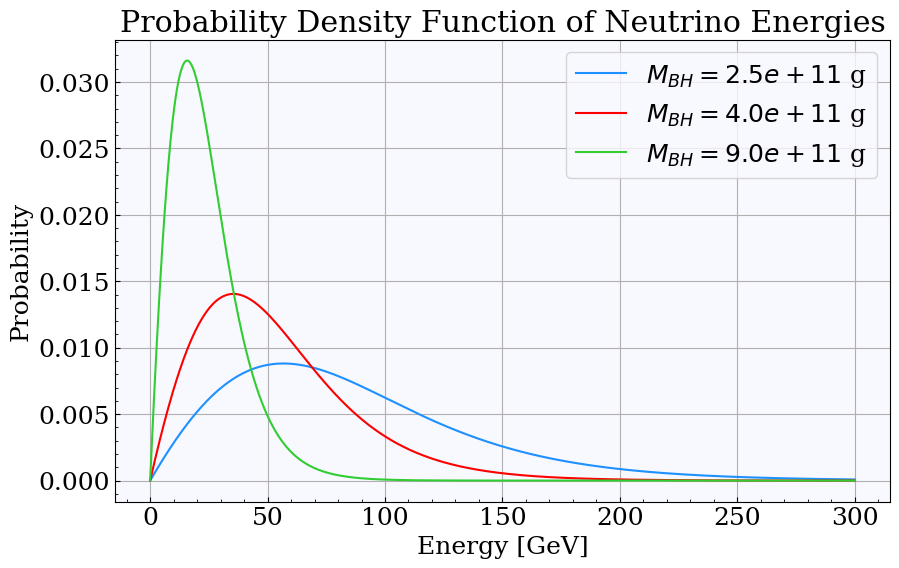

In [325]:
# Plot the PDF of neutrino energies for different black hole masses

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

for i in range(len(M_bh)):
    ax.plot(E, norm_PDF[i], label=f'$M_{{BH}} = {M_bh[i]:.1e}$ g')

ax.set_xlabel('Energy [GeV]')
ax.set_ylabel('Probability')
ax.set_title('Probability Density Function of Neutrino Energies')
ax.legend()

if save_plots:
    plt.savefig('PDF_Mbh.png', dpi=300)

# Exercise 1b

In [326]:
# Load the data
data = pd.read_csv('neutrino_energies.csv', header=0, names=['E'])

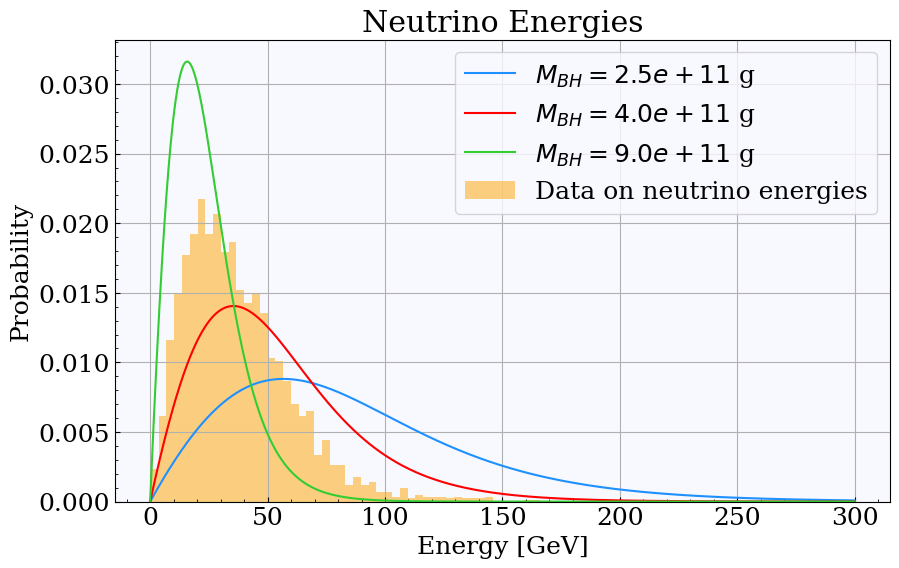

In [327]:
# Historgram of neutrino energies along with the PDFs

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

for i in range(len(M_bh)):
    ax.plot(E, norm_PDF[i], label=f'$M_{{BH}} = {M_bh[i]:.1e}$ g')

ax.hist(data['E'].to_numpy(), bins=50, density=True, alpha=0.5, label='Data on neutrino energies')
ax.set_xlabel('Energy [GeV]')
ax.set_ylabel('Probability')
ax.set_title('Neutrino Energies')
ax.legend()

if save_plots:
    plt.savefig('neutrino_energies_hist.png', dpi=300)

In [328]:
# Best guess on the mass of the black hole

print('The eye-ball estimate of the true mass of the black hole is between 4e11 g and 9e11 g, i.e.  approx.: 6.5e11 g')

The eye-ball estimate of the true mass of the black hole is between 4e11 g and 9e11 g, i.e.  approx.: 6.5e11 g


# Exercise 1c

Make a 1D raster scan of the unbinned ln-likelihood of the neutrino energy data for a reasonable range of the black hole masses

In [329]:
# 1D raster scan of the likelihood function for the black hole mass

def ln_likelihood(data, M, func=PDF):
    """Function to calculate the ln likelihood of the data given a mass M and a PDF function."""
    return np.sum(np.log(func(np.sort(data), M)))

# Scan the likelihood function for different values of the black hole mass
M_scan = np.linspace(4.5, 7, 1000) * 10**11     # Values of the black hole mass to scan
L = np.array([ln_likelihood(data['E'].to_numpy(), M, PDF) for M in M_scan])     # Ln likelihood for each mass
L_max, M_max = np.max(L), M_scan[np.argmax(L)]   # Maximum likelihood and the corresponding mass

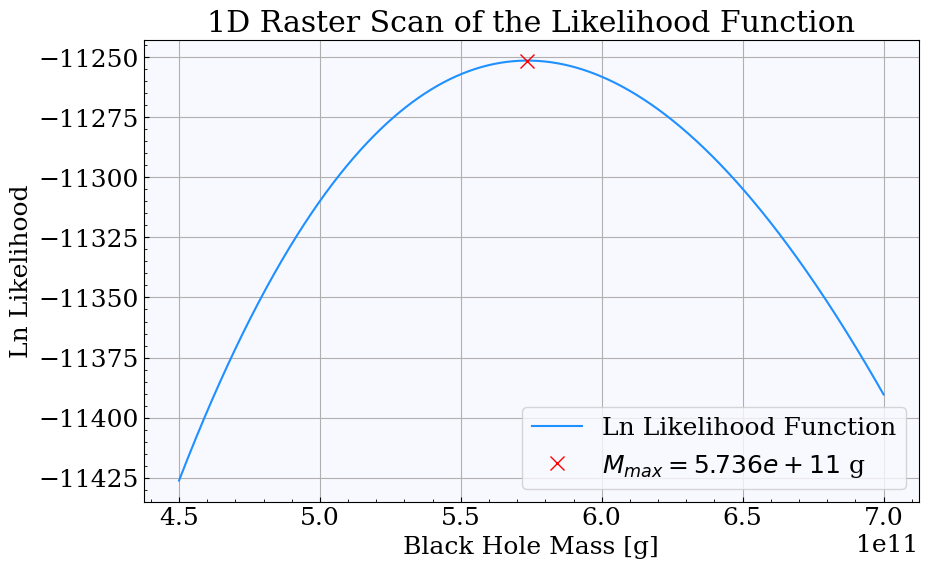

In [330]:
# Plot the likelihood function

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(M_scan, L, label='Ln Likelihood Function')
ax.plot(M_max, L_max, 'x', ms=10, color='red', label=f'$M_{{max}} = {M_max:.3e}$ g')
ax.set_xlabel('Black Hole Mass [g]')
ax.set_ylabel('Ln Likelihood')
ax.set_title('1D Raster Scan of the Likelihood Function')
ax.legend()

if save_plots:
    plt.savefig('1D_raster_scan.png', dpi=300)

In [331]:
# Find the 1-sigma confidence interval to estimate the uncertainty of the mass
L_max05 = L_max - 0.5  # For 1 fit parameter the 1-sigma confidence interval is given by a difference of 0.5
intersection = []

for i in range(len(L)):
    if np.abs(L[i] - L_max05) < 1.75e-2:
        intersection.append(M_scan[i])

print(f'The 1-sigma confidence interval is between {intersection[0]:.3e} g and {intersection[1]:.3e} g')

# Report as uncertainty 

print(f'M parameter: {M_max:.3e} +{intersection[1] - M_max:.3e} -{M_max - intersection[0]:.3e}')
print('As the LLH function is approx. symemetric in the interval, the reported upper and lower uncertainties are to a large degree the same.')

The 1-sigma confidence interval is between 5.666e+11 g and 5.806e+11 g
M parameter: 5.736e+11 +7.007e+09 -7.007e+09
As the LLH function is approx. symemetric in the interval, the reported upper and lower uncertainties are to a large degree the same.


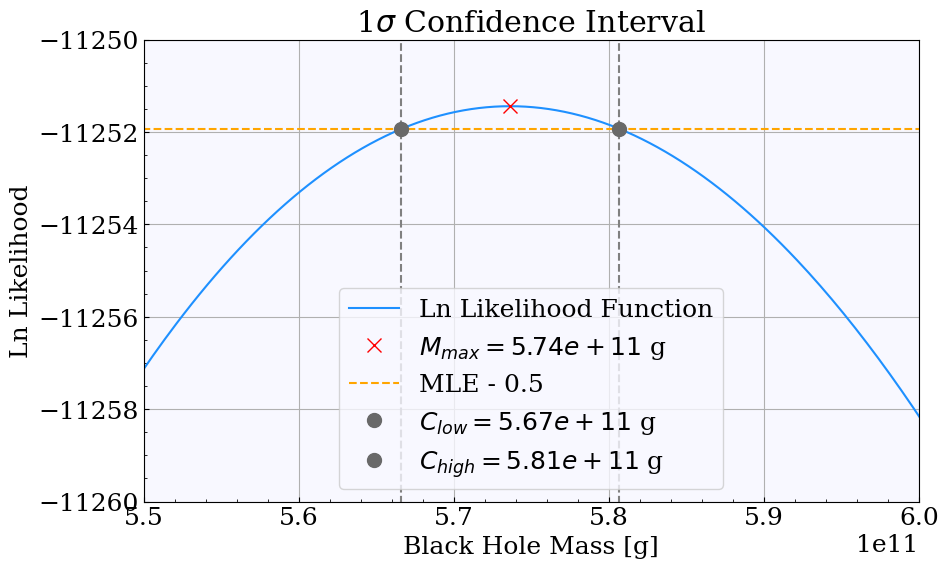

In [413]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.plot(M_scan, L, label='Ln Likelihood Function')
ax.plot(M_max, L_max, 'x', ms=10, color='red', label=f'$M_{{max}} = {M_max:.2e}$ g')

ax.hlines(L_max - 0.5, M_scan[0], M_scan[-1], color='orange', linestyle='--', label='MLE - 0.5')
ax.vlines(intersection[0], L_max05 + 5, L_max05 - 10, linestyle='--', color='grey')
ax.vlines(intersection[1], L_max05 + 5, L_max05 - 10, linestyle='--', color='grey')

ax.plot(intersection[0], L_max05, 'o', ms=10, color='dimgrey', label=f'$C_{{low}} = {intersection[0]:.2e}$ g')
ax.plot(intersection[1], L_max05, 'o', ms=10, color='dimgrey', label=f'$C_{{high}} = {intersection[1]:.2e}$ g')

ax.set_xlabel('Black Hole Mass [g]')
ax.set_ylabel('Ln Likelihood')
ax.set_title(r'1$\sigma$ Confidence Interval')
ax.set_xlim(5.5e11, 6e11)
ax.set_ylim(-11260, -11250)
ax.legend()

if save_plots:
    plt.savefig('1sigma_confidence_interval.png', dpi=300)

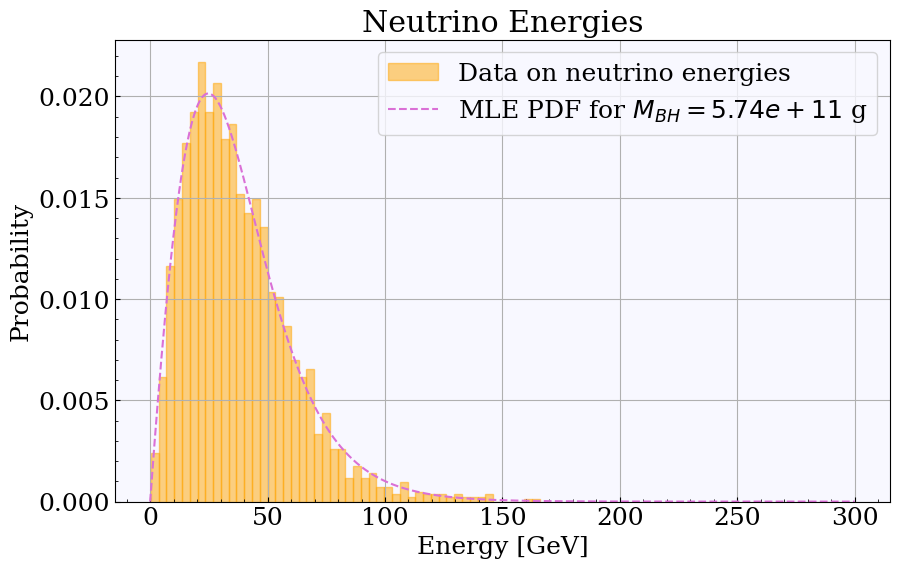

In [382]:
# Producing the pdf for the MLE of the black hole mass

pdf_max = PDF(E, M_max)

# Historgram of neutrino energies

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.hist(data['E'].to_numpy(), bins=50, color='orange', edgecolor='orange', density=True, alpha=0.5, label='Data on neutrino energies')
ax.plot(E, pdf_max, label=f'MLE PDF for $M_{{BH}} = {M_max:.2e}$ g', color='orchid', linestyle='--')
ax.set_xlabel('Energy [GeV]')
ax.set_ylabel('Probability')
ax.set_title('Neutrino Energies')
ax.legend()

if save_plots:
    plt.savefig('neutrino_energies_hist_MLE.png', dpi=300)

In [334]:
# Values of LLH at MLE estimate and the three proposed black hole masses

L_MLE = ln_likelihood(data['E'].to_numpy(), M_max, PDF)
L_proposed = [ln_likelihood(data['E'].to_numpy(), M, PDF) for M in M_bh]

print(f'The ln likelihood at the MLE estimate {M_max:.3e} is {L_MLE:.2f}')

for i in range(len(M_bh)):
    print(f'The ln likelihood at the proposed mass {M_bh[i]:.2e} is {L_proposed[i]:.2f}')


The ln likelihood at the MLE estimate 5.736e+11 is -11251.44
The ln likelihood at the proposed mass 2.50e+11 is -12763.84
The ln likelihood at the proposed mass 4.00e+11 is -11617.57
The ln likelihood at the proposed mass 9.00e+11 is -12024.67


# Exercise 1d

In [335]:
# Use a minimizer to find the MLE of the black hole mass

def fit_obj(M):
    return -ln_likelihood(data['E'].to_numpy(), M)

initial_guess = 5.5e11

m = Minuit(fit_obj, M=initial_guess)
m.limits['M'] = (4e11, 9e11)
m.migrad()


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.125e+04                  │              Nfcn = 16               │
│ EDM = 1.1e-06 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ M    │ 0.574e12  │ 0.010e12  │            │            │  4e+11  │  9e+11  │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────┐
│   │       M │
├───┼─────────┤
│ M │ 1.01e+2 │
└───┴─────────┘

In [336]:
# Print the results
M_best_fit = m.values['M']
print(f'The MLE of the black hole mass is {M_best_fit:.3e} g for the minimizer')

The MLE of the black hole mass is 5.736e+11 g for the minimizer


In [337]:
# Produce 500 psedo-trials of the neurtino energies 

N_trials = 500
N_points = len(data['E'])

pseudo_data = []
M_fit_vals = []

for trial in range(N_trials):
    
    x_rans = np.random.uniform(min(E), max(E), 8*N_points)
    y_rans = np.random.uniform(0, 0.09, 8*N_points)
    func_vals = PDF(x_rans, M_max, norm=False)
    trial_data = []

    i = 0 
    while len(trial_data) < N_points:

        if y_rans[i] <= func_vals[i]:
            trial_data.append(x_rans[i])
            
        i+=1

    pseudo_data.append(trial_data)

    def fit_obj(M):
        return -ln_likelihood(trial_data, M)

    initial_guess = 5.5e11

    m = Minuit(fit_obj, M=initial_guess)
    m.limits['M'] = (4e11, 9e11)
    m.migrad()
    M_fit_vals.append(m.values['M'])


In [338]:
# Get uncertainties on the fit parameter by integrating the distribution of the fit parameter
limit = (100 - 68.27) / 2 / 100

M_fit_vals = np.sort(M_fit_vals)

M_low = M_fit_vals[int(limit * N_trials)]
M_high = M_fit_vals[int((1 - limit) * N_trials)]

print(f'M parameter: {M_best_fit:.3e} +{M_high - M_best_fit:.3e} -{M_best_fit - M_low:.3e}')

M parameter: 5.736e+11 +6.654e+09 -7.102e+09


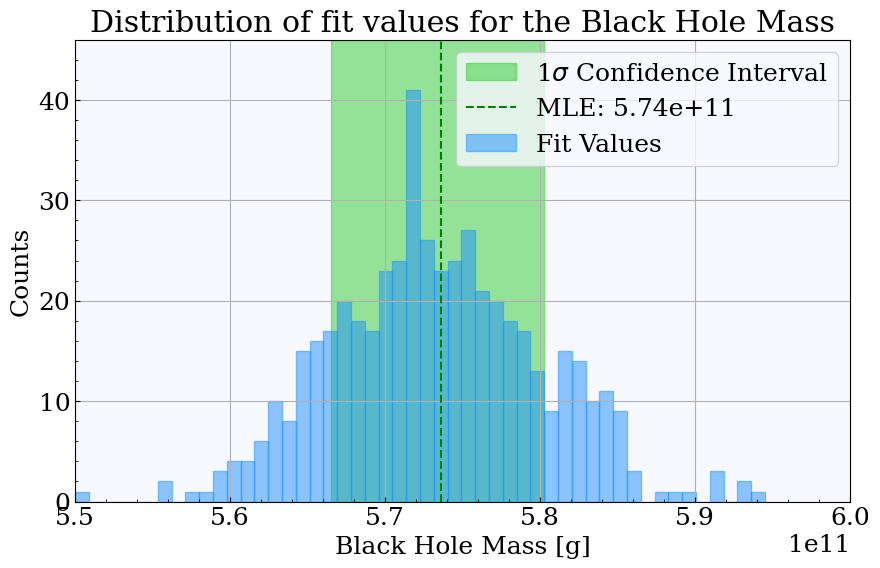

In [414]:
# Plot the distribution of the fit parameter
# Diffrent color for the values below and above the 1-sigma confidence interval

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

hist, bins = np.histogram(M_fit_vals, bins=50)

ax.fill_betweenx([0, max(hist) + 5], M_low, M_high, color='limegreen', alpha=0.5, label='1$\sigma$ Confidence Interval')
ax.vlines(M_best_fit, 0, max(hist) + 5, color='green', linestyle='dashed', label=f'MLE: {M_best_fit:.2e}')
ax.hist(M_fit_vals, bins=50, color='dodgerblue', edgecolor='dodgerblue', alpha=0.5, label='Fit Values')

ax.set_xlabel('Black Hole Mass [g]')
ax.set_ylabel('Counts')
ax.set_xlim(5.5e11, 6e11) 
ax.set_ylim(0, max(hist) + 5)
ax.set_title('Distribution of fit values for the Black Hole Mass')
ax.legend()

if save_plots:
    plt.savefig('fit_parameter_distribution.png', dpi=300)

In [290]:
# Test if the MLE estimate and the fit value of the black hole mass are consistent

M_value_diff = M_best_fit - M_max

print(f'The difference between the MLE estimate and the fit value of the black hole mass is {M_value_diff:.3e} g')
print('The difference is within the 1-sigma confidence interval of both estimates, and the two values are therefore consistent.')

The difference between the MLE estimate and the fit value of the black hole mass is -5.369e+06 g
The difference is within the 1-sigma confidence interval of both estimates, and the two values are therefore consistent.


# Exercise 2

In [155]:
def bayes_llh(x, alpha, beta):
    func = scipy.stats.gamma.pdf(x, alpha, scale=1/beta)
    func /= scipy.integrate.trapz(func, x)
    return func

def prior(x):
    N = 1.6 + 2.66*2.1 - 2.66*1.6 # Analytical result for normalization constant
    if x > 0 and x <= 1.6:
        return 1/N 
    elif x > 1.6 and x <= 2.1:
        return 2.66/N
    else:
        return 0
    
def posterior(x, alpha, beta):
    func = bayes_llh(x, alpha, beta) * [prior(x) for x in x]
    func /= scipy.integrate.trapz(func, x)
    return func

In [386]:
x_axis = np.linspace(0, 4, 1000)
alpha, beta = 2, 2

bayes_posterior = posterior(x_axis, alpha, beta)
bayes_posterior /= scipy.integrate.trapz(bayes_posterior, x_axis)
P_max = np.max(bayes_posterior)
x_max = x_axis[np.argmax(bayes_posterior)]

print(f'The maximum value of the posterior is {P_max:.3f} at x = {x_max:.3f}')

The maximum value of the posterior is 0.683 at x = 0.501


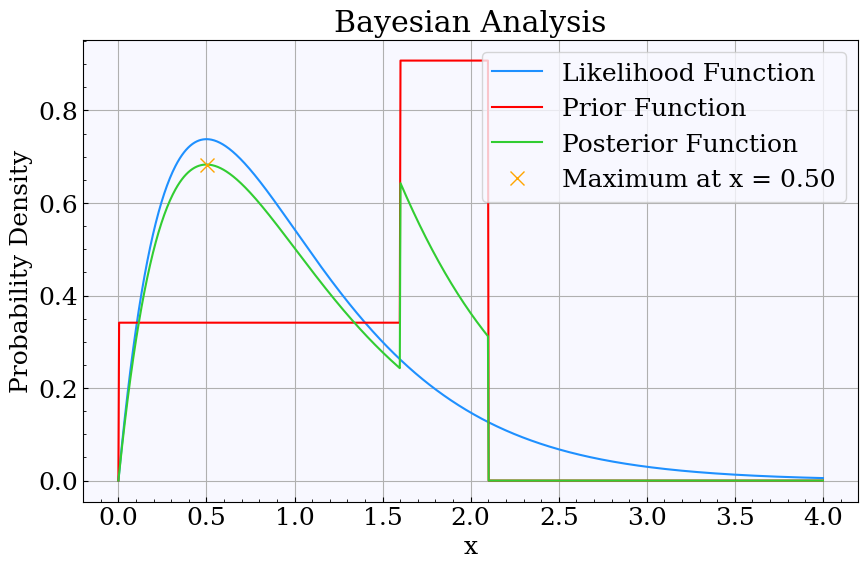

In [383]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.plot(x_axis, bayes_llh(x_axis, alpha, beta), label='Likelihood Function')
ax.plot(x_axis, [prior(x) for x in x_axis], label='Prior Function')
ax.plot(x_axis, posterior(x_axis, alpha, beta), label='Posterior Function')
ax.plot(x_max, P_max, 'x', ms=10, label=f'Maximum at x = {x_max:.2f}')

ax.set_xlabel('x')
ax.set_ylabel('Probability Density')
ax.set_title('Bayesian Analysis')
ax.legend()

if save_plots:
    plt.savefig('bayesian_analysis.png', dpi=300)

# Exercise 3

In [393]:
r = 5  # km 
m = 1 # kg 
step = 0.2 # The crabs move 0.2 km per day 
T_max = 200 # Number of days

def intersect_circle(p0, p1):
    # Line segment from p0 to p1
    a = (p1[1] - p0[1]) / (p1[1] - p0[1])
    y = p0[1] - a * p0[0]

    # Discriminant 
    A = 1 + a**2
    B = 2 * a * y
    C = y**2 - r**2
    D = B**2 - 4 * A * C

    if D < 0:
        return p0
    
    else: 
        x_intersect1 = (-B + np.sqrt(D)) / (2 * A)
        x_intersect2 = (-B - np.sqrt(D)) / (2 * A)  

        y_intersect1 = a * x_intersect1 + y
        y_intersect2 = a * x_intersect2 + y

        if np.abs(p0[0] - x_intersect1) < np.abs(p0[0] - x_intersect2):
            return np.array([x_intersect1, y_intersect1])
        else:
            return np.array([x_intersect2, y_intersect2])




def crab_step(p, r, step, direction):
    # Propose a new position for the crab
    x_proposal = p[0] + step * np.cos(direction)
    y_proposal = p[1] + step * np.sin(direction)

    r_pos = np.sqrt(x_proposal**2 + y_proposal**2)

    # If the proposed position is within the radius of the island, the crab moves there
    if r_pos < r:
        p_x = x_proposal
        p_y = y_proposal
        distance = step

    # If the proposed position is outside the radius of the island, the crab moves to the edge of the island
    else:
        
        p_x, p_y = intersect_circle(p, [x_proposal, y_proposal])
        distance = np.sqrt((p_x - p[0])**2 + (p_y - p[1])**2)
    
    return np.array([p_x, p_y]), distance



def crab_walk(p0, r, step, T_max, hit_edge=False):

    total_distance = 0    # Keeping track of the total distance the crab has moved
    day = 1  

    if hit_edge: 

        position = [p0]   # Store the position of the crab in a list, as we don't know the size of the array in advance
        hit = False

        # The crab moves until it hits the edge of the island
        while hit == False:
            direction = np.random.uniform(0, 2*np.pi)   # Draw a random number for the direction of the crab
            pos, distance = crab_step(position[-1], r, step, direction)
            position.append(pos)
            total_distance += distance

            if distance < step:
                hit = True

            day += 1

    else:
        direction = np.random.uniform(0, 2*np.pi, 4*T_max)    # Draw all random numbers at once
        position = np.zeros((T_max+1, 2))    # Array to store the x- and y-position of the crab
        position[0,:] = p0                   # Set the initial position of the crab

        # The crab moves for a fixed number of days
        while day < T_max + 1:

            position[day,:], distance = crab_step(position[day-1,:], r, step, direction[day])
            total_distance += distance

            day += 1
    
    return position, total_distance

In [394]:
p0 = np.array([3.6, -2.0])

position, total_distance = crab_walk(p0, r, step, T_max, hit_edge=False)

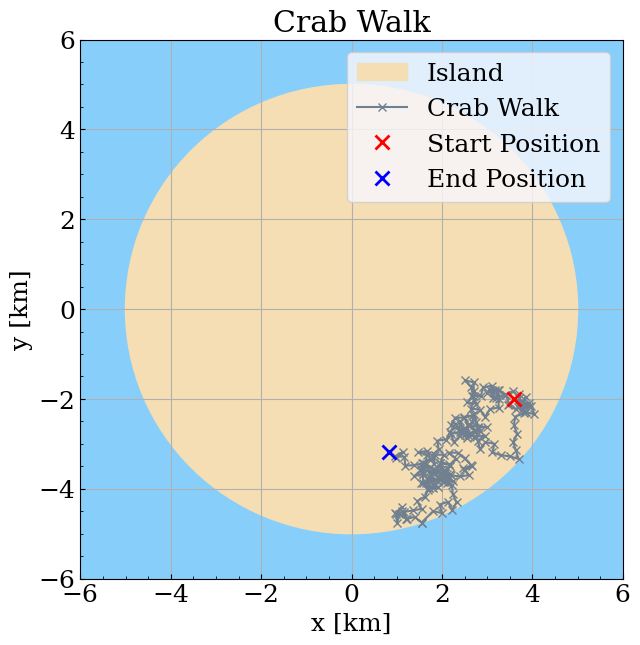

In [395]:
# Plot the crab walk

fig, ax = plt.subplots(1, 1, figsize=(7, 7))

Drawing_colored_circle = plt.Circle((0.0, 0.0), 5, color='wheat', fill=True, label='Island')
 
ax.add_artist( Drawing_colored_circle )

ax.plot(position[:,0], position[:,1], '-x', color='slategrey', label='Crab Walk')
ax.plot(p0[0], p0[1], 'x', color='red', ms=10, mew=2, label='Start Position')
ax.plot(position[-1,0], position[-1,1], 'x', ms=10, mew=2, color='blue', label='End Position')
ax.set_xlabel('x [km]')
ax.set_ylabel('y [km]')
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
ax.set_facecolor('lightskyblue')
ax.set_title('Crab Walk')
ax.legend(loc='upper right')

if save_plots:
    plt.savefig('crab_walk.png', dpi=300)

# Exercise 3b 

In [396]:
N_trials = 501

distances = np.zeros(N_trials)

for i in range(N_trials):
    position, distance = crab_walk(p0, r, step, T_max, hit_edge=True)
    distances[i] = distance


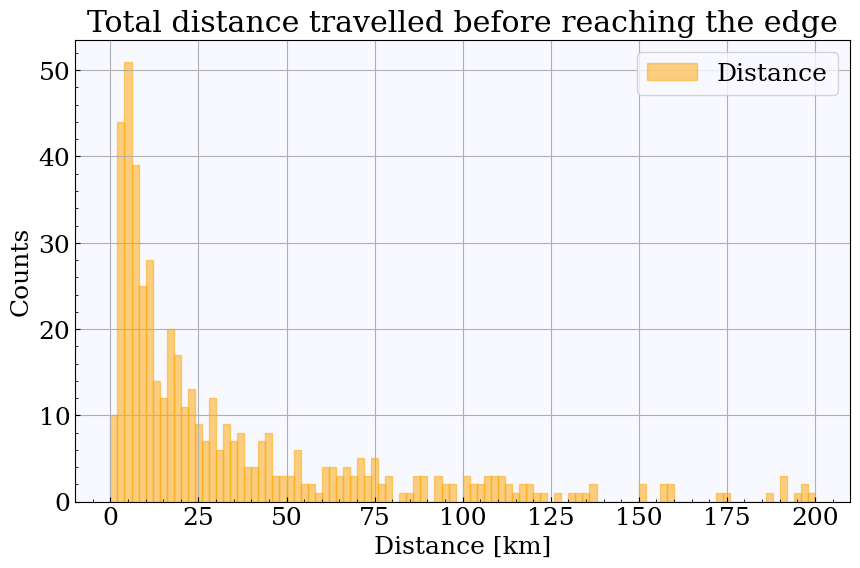

In [412]:
# Plot results as a histrgram

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.hist(distances, range=(0, 200), bins=100, color='orange', edgecolor='orange', alpha=0.5, label='Distance')
ax.set_xlabel('Distance [km]')
ax.set_ylabel('Counts')
ax.set_title('Total distance travelled before reaching the edge')
ax.legend()

if save_plots:
    plt.savefig('distance_to_edge.png', dpi=300)


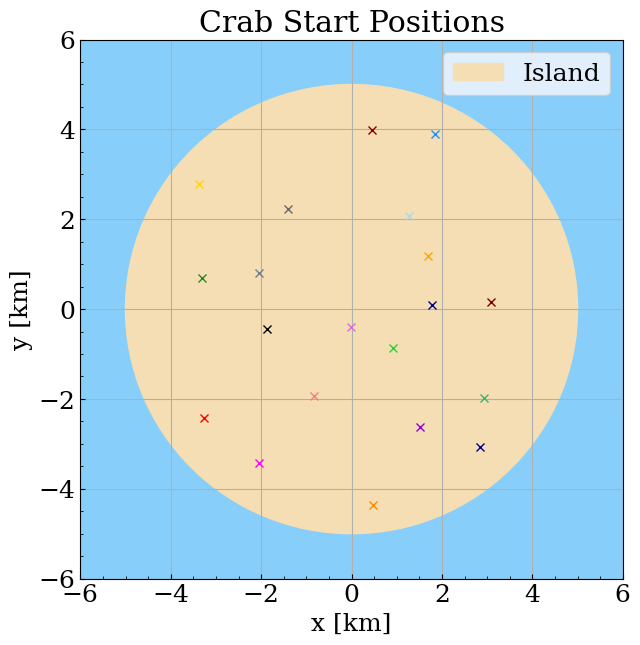

In [398]:
# Load data on the start positions of the crabs
crabs_p0 = np.loadtxt('CrabStartPositions.txt')

# Plot the start positions of the crabs

fig, ax = plt.subplots(1, 1, figsize=(7, 7))

Drawing_colored_circle = plt.Circle((0.0, 0.0), r, color='wheat', fill=True, label='Island')

ax.add_artist( Drawing_colored_circle )

for i in range(len(crabs_p0)):
    ax.plot(crabs_p0[i,0], crabs_p0[i,1], 'x')
    
ax.set_xlabel('x [km]')
ax.set_ylabel('y [km]')
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
ax.set_facecolor('lightskyblue')
ax.set_title('Crab Start Positions')
ax.legend(loc='upper right')

if save_plots:
    plt.savefig('crab_start_positions.png', dpi=300)

In [399]:
def crab_battle(N_crabs, p0, r, step, T_max):

    position = p0 
    new_pos= np.zeros((N_crabs, 2))
    mass = np.ones(N_crabs)
    day = 1

    while day < T_max + 1:

        direction = np.random.uniform(0, 2*np.pi, N_crabs)    # Draw random numbers for all crabs at once

        for crab in range(N_crabs):  # New position for each alive crab
            if mass[crab] > 0:
                new_pos[crab,:], distance = crab_step(position[crab,:], r, step, direction[crab])  
        
        # Calculate the crabs distance to each other 
        distance = np.ones((N_crabs, N_crabs)) * 100
        
        for i in range(N_crabs):
            if mass[i] > 0:
                for j in range(i + 1, N_crabs):
                    if mass[j] > 0:
                        distance[i,j] = np.sqrt((new_pos[i,0] - new_pos[j,0])**2 + (new_pos[i,1] - new_pos[j,1])**2)
                    

        # Check if any of the crabs are within 0.175 km of each other 
        fight = np.argwhere(distance < 0.175)

        # If multiple crabs are within 0.175 km of each other, the battle occurs in order of the shortest distance
        if len(fight) > 1:
            fight = fight[np.argsort(distance[fight[:,0], fight[:,1]])]

        for i in range(len(fight)):

            mass1 = mass[fight[i,0]]     # The mass of the two crabs in the fight
            mass2 = mass[fight[i,1]]

            if (mass1 == 0) or (mass2 == 0):  # If one of the crabs are dead, the fight is skipped
                continue
            
            # If the crabs have equal mass, there is a 25% chance that one of the crabs consumes the other
            if mass1 == mass2: 
                p_consume = np.random.uniform(0, 1)

                # If the random number is less than 0.25, the crab with the lowest index consumes the other
                if p_consume < 0.25: 
                    mass[fight[i,0]] += mass[fight[i,1]]
                    mass[fight[i,1]] = 0
                    new_pos[fight[i,1],:] = np.array([100, 100]) 

                # If the random number is greater than 0.75, the crab with the highest index consumes the other
                elif p_consume > 0.75: 
                    mass[fight[i,1]] += mass[fight[i,0]]
                    mass[fight[i,0]] = 0
                    new_pos[fight[i,0],:] = np.array([100, 100])


            elif mass1 > mass2:            
                big_crab = fight[i,0]
                small_crab = fight[i,1]

                # Calculate the odds of the big crab consuming the small crab
                consume_odds = mass[big_crab]**2 / (mass[big_crab]**2 + mass[small_crab]**2)
                p_consume = np.random.uniform(0, 1)

                # If the odds are greater than the random number, the big crab consumes the small crab
                if p_consume < consume_odds:
                    mass[big_crab] += mass[small_crab]
                    mass[small_crab] = 0
                    new_pos[small_crab,:] = np.array([100, 100])  # Move the small crab to a position outside the island

            else:
                big_crab = fight[i,1]
                small_crab = fight[i,0]

                # Calculate the odds of the big crab consuming the small crab
                consume_odds = mass[big_crab]**2 / (mass[big_crab]**2 + mass[small_crab]**2)
                p_consume = np.random.uniform(0, 1)

                # If the odds are greater than the random number, the big crab consumes the small crab
                if p_consume < consume_odds:
                    mass[big_crab] += mass[small_crab]
                    mass[small_crab] = 0
                    new_pos[small_crab,:] = np.array([100, 100])  # Move the small crab to a position outside the island

          
        if np.sum(mass) != 20:
            print('The total mass of the crabs is not conserved')
            break
        
        position = new_pos
        day += 1
    
    return position, mass
    

In [400]:
N_crabs = 20
crabs_p0 = np.loadtxt('CrabStartPositions.txt')
N_CrabBattles = 500
crabs_alive = np.zeros(N_CrabBattles)
max_mass = np.zeros(N_CrabBattles)

for i in range(N_CrabBattles):
    position, mass = crab_battle(N_crabs, crabs_p0, r, step, T_max)
    crabs_alive[i] = np.count_nonzero(mass)
    max_mass[i] = np.max(mass)

In [401]:
# Most likely number of crabs alive after 200 days
most_likely_alive = np.bincount(crabs_alive.astype(int)).argmax()
print(f'The most likely number of crabs alive after 200 days is {most_likely_alive}')

# Most likely maximum mass of a crab after 200 days
most_likely_max_mass = np.bincount(max_mass.astype(int)).argmax()
print(f'The most likely maximum mass of a crab after 200 days is {most_likely_max_mass}')

The most likely number of crabs alive after 200 days is 13
The most likely maximum mass of a crab after 200 days is 3


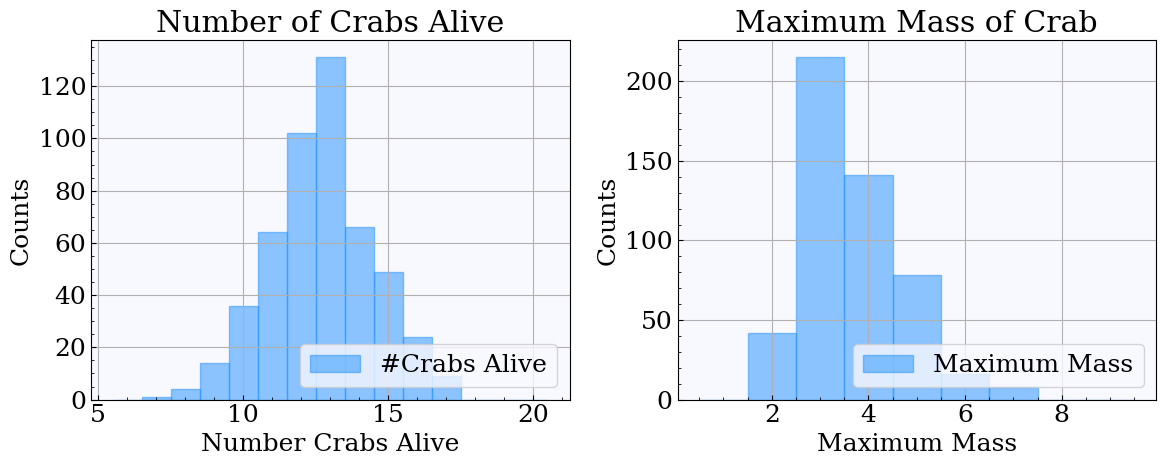

In [402]:
# Plot the result of the crab battles as histograms

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].hist(crabs_alive, range=(5.5,20.5), bins=15, alpha=0.5, edgecolor='dodgerblue', label='#Crabs Alive')
ax[0].set_xlabel('Number Crabs Alive')
ax[0].set_ylabel('Counts')
ax[0].set_title('Number of Crabs Alive')
ax[0].legend(loc='lower right')

ax[1].hist(max_mass, range=(0.5, 9.5), bins=9, alpha=0.5, edgecolor='dodgerblue', label='Maximum Mass')
ax[1].set_xlabel('Maximum Mass')
ax[1].set_ylabel('Counts')
ax[1].set_title('Maximum Mass of Crab')
ax[1].legend(loc='lower right')

fig.tight_layout()

if save_plots:
    plt.savefig('crab_battle_results.png', dpi=300)

# Exercise 3d

In [403]:
def crab_battle_NCrabs(N_crabs, p0, r, step, alive_max, max_iteration):

    position = p0.copy() 
    new_pos= np.zeros((N_crabs, 2))
    mass = np.ones(N_crabs)

    for day in range(1, max_iteration):

        direction = np.random.uniform(0, 2*np.pi, N_crabs)    # Draw random numbers for all crabs at once

        for crab in range(N_crabs):  # New position for each alive crab
            if mass[crab] > 0:
                new_pos[crab,:], distance = crab_step(position[crab,:], r, step, direction[crab])  
        
        # Calculate the crabs distance to each other 
        distance = np.ones((N_crabs, N_crabs)) * 100
        
        for i in range(N_crabs):
            if mass[i] > 0:
                for j in range(i + 1, N_crabs):
                    if mass[j] > 0:
                        distance[i,j] = np.sqrt((new_pos[i,0] - new_pos[j,0])**2 + (new_pos[i,1] - new_pos[j,1])**2)
                    

        # Check if any of the crabs are within 0.175 km of each other 
        fight = np.argwhere(distance < 0.175)

        # If multiple crabs are within 0.175 km of each other, the battle occurs in order of the shortest distance
        if len(fight) > 1:
            fight = fight[np.argsort(distance[fight[:,0], fight[:,1]])]

        for i in range(len(fight)):

            mass1 = mass[fight[i,0]]     # The mass of the two crabs in the fight
            mass2 = mass[fight[i,1]]

            if (mass1 == 0) or (mass2 == 0):  # If one of the crabs are dead, the fight is skipped
                continue
            
            # If the crabs have equal mass, there is a 25% chance that one of the crabs consumes the other
            if mass1 == mass2: 
                p_consume = np.random.uniform(0, 1)

                # If the random number is less than 0.25, the crab with the lowest index consumes the other
                if p_consume < 0.25: 
                    mass[fight[i,0]] += mass[fight[i,1]]
                    mass[fight[i,1]] = 0
                    new_pos[fight[i,1],:] = np.array([100, 100]) 

                # If the random number is greater than 0.75, the crab with the highest index consumes the other
                elif p_consume > 0.75: 
                    mass[fight[i,1]] += mass[fight[i,0]]
                    mass[fight[i,0]] = 0
                    new_pos[fight[i,0],:] = np.array([100, 100])


            elif mass1 > mass2:            
                big_crab = fight[i,0]
                small_crab = fight[i,1]

                # Calculate the odds of the big crab consuming the small crab
                consume_odds = mass[big_crab]**2 / (mass[big_crab]**2 + mass[small_crab]**2)
                p_consume = np.random.uniform(0, 1)

                # If the odds are greater than the random number, the big crab consumes the small crab
                if p_consume < consume_odds:
                    mass[big_crab] += mass[small_crab]
                    mass[small_crab] = 0
                    new_pos[small_crab,:] = np.array([100, 100])  # Move the small crab to a position outside the island

            else:
                big_crab = fight[i,1]
                small_crab = fight[i,0]

                # Calculate the odds of the big crab consuming the small crab
                consume_odds = mass[big_crab]**2 / (mass[big_crab]**2 + mass[small_crab]**2)
                p_consume = np.random.uniform(0, 1)

                # If the odds are greater than the random number, the big crab consumes the small crab
                if p_consume < consume_odds:
                    mass[big_crab] += mass[small_crab]
                    mass[small_crab] = 0
                    new_pos[small_crab,:] = np.array([100, 100])  # Move the small crab to a position outside the island
            
                
        if np.sum(mass) != 20:
            print('The total mass of the crabs is not conserved')
            break
        
        position = new_pos

        if np.count_nonzero(mass) == alive_max:
            break
    
    return position, mass, day
    

In [404]:
# Calculate the number of days it takes for 10 crabs to be alive

N_experiments = 500
alive_max = 10 
max_iteration = int(10e4)
total_days = np.zeros(N_experiments)

for i in range(N_experiments):
    if i % 100 == 0:
        print(f'Experiment {i} of {N_experiments}')
    position, mass, total_days[i] = crab_battle_NCrabs(N_crabs, crabs_p0, r, step, alive_max, max_iteration)


Experiment 0 of 500
Experiment 100 of 500
Experiment 200 of 500
Experiment 300 of 500
Experiment 400 of 500


In [405]:
# Exclude the experiments where the crabs did not reach the desired number of crabs alive

Total_days = total_days[total_days < max_iteration - 1]

In [406]:
# The number of excluded experiments
N_excluded = N_experiments - len(Total_days)

print(f'The number of experiments where the crabs did not reach the desired number of crabs alive is {N_excluded}')

The number of experiments where the crabs did not reach the desired number of crabs alive is 4


In [407]:
# Get 1 sigma confidence interval
Total_days = np.sort(Total_days)

C_low = Total_days[int(limit * N_experiments)]
C_high = Total_days[int((1 - limit) * N_experiments)]

print(f'The 1-sigma confidence interval is between {C_low} and {C_high}')

The 1-sigma confidence interval is between 221.0 and 424.0


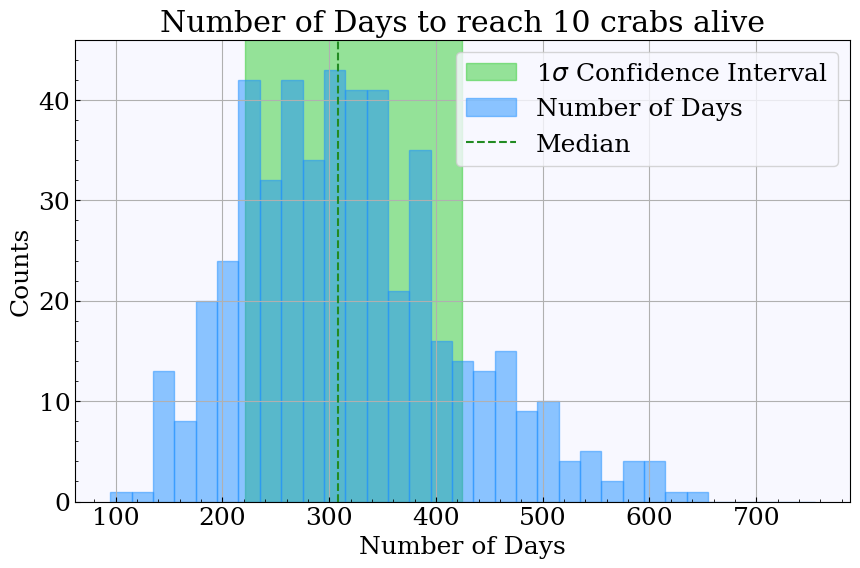

In [410]:
# Plot the result of the crab battles as histograms

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.fill_betweenx([0, 100], C_low, C_high, color='limegreen', alpha=0.5, label='1$\sigma$ Confidence Interval')
ax.hist(Total_days, range=(95, 755), bins=33, alpha=0.5, edgecolor='dodgerblue', label='Number of Days')
ax.vlines(np.median(Total_days), 0, 100, color='forestgreen', linestyle='--', label='Median')
ax.set_xlabel('Number of Days')
ax.set_ylabel('Counts')
ax.set_ylim(0, 46)
ax.set_title('Number of Days to reach 10 crabs alive')
ax.legend()

if save_plots:
    plt.savefig('crab_battle_NCrabs.png', dpi=300)
